In [1]:
import os
import sys
print(os.getcwd())
sys.path.append("../WanPy")

from WanPy import *
from pythtb import *
from pythTB_wan import Bloch, K_mesh, Wannier, Lattice
import models
import plotting as plot

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

/Users/treycole/Codes/WanPy/top_obstruction


In [2]:
# tight-binding parameters
delta = 1
t = 1
t2 = -0.4

n_super_cell = 2
model = models.Haldane(delta, t, t2).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

low_E_sites = np.arange(0, model.get_num_orbitals(), 2)
high_E_sites = np.arange(1, model.get_num_orbitals(), 2)
lat_vecs = model.get_lat()
orb_vecs = model.get_orb()

n_orb = model.get_num_orbitals()
n_occ = int(n_orb/2)

u_wfs_full = wf_array(model, [20, 20])
u_wfs_full.solve_on_grid([0, 0])
chern = u_wfs_full.berry_flux([i for i in range(n_occ)])/(2*np.pi)


print(f"Low energy sites: {low_E_sites}")
print(f"High energy sites: {high_E_sites}")
print(f"Chern #: {chern: .1f}")
# model.display()

Low energy sites: [0 2 4 6]
High energy sites: [1 3 5 7]
Chern #:  1.0


In [3]:
# tight-binding parameters
delta = 1
t = -1

n_super_cell = 2
model_triv = models.Haldane(delta, t, -0.1).make_supercell([[n_super_cell, 0], [0, n_super_cell]])
model_top = models.Haldane(delta, t, -0.4).make_supercell([[n_super_cell, 0], [0, n_super_cell]])

## Haldane band structure

In [4]:
path = [[0, 0], [2/3, 1/3], [.5, .5], [1/3, 2/3], [0, 0]]
label = (r'$\Gamma $',r'$K$', r'$M$', r'$K^\prime$', r'$\Gamma $')

# title = (
#   "Haldane model \n"
#   fr"$C = {chern_occ: .1f}$, $\Delta = {delta}$, $t= {t: .2f}, t_2 = {t2: .2f}$"
#   )

In [5]:
eigstates_triv = Bloch(model_triv, 20, 20)
eigstates_triv.solve_model()

eigstates_top = Bloch(model_top, 20, 20)
eigstates_top.solve_model()

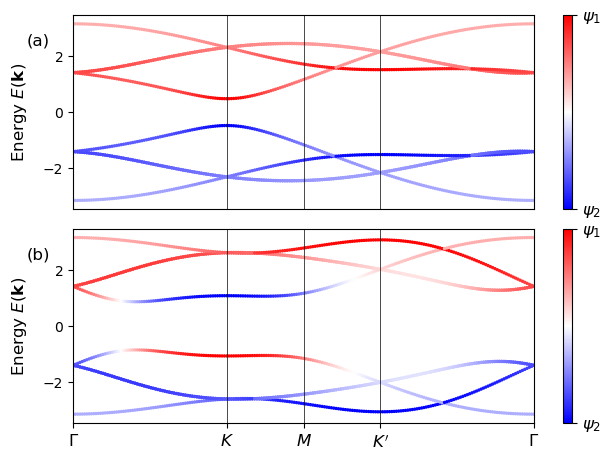

In [6]:
fig, axs = plt.subplots(2, 1, gridspec_kw={'hspace':0.1}, sharex=True)

eigstates_triv.plot_bands(path, nk=201, sub_lat=True, scat_size=2, red_lat_idx=high_E_sites, fig=fig, ax=axs[0])
eigstates_top.plot_bands(path, nk=201, k_label=label, sub_lat=True, scat_size=2, red_lat_idx=high_E_sites, fig=fig, ax=axs[1])

axs[0].xaxis.set_ticks_position('none')
axs[0].text(-.1, 2.4, '(a)', size=12)
axs[1].text(-.1, 2.4, '(b)', size=12)

plt.subplots_adjust(top=0.95, bottom=0.1, left=0.1, right=1)

save_name = f'Delta={delta}_t={t}_n_occ={n_occ}_comparison'

plt.savefig(f'images/Haldane_bands_{save_name}.png', dpi=700)